In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("threads_reviews.csv")

In [6]:
df.head()

source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   
2  Google Play  For a brand new app, it's very well optimized....       3   
3  Google Play  Great app with a lot of potential! However, th...       3   
4  Google Play  The app is good, but it needs a lot of functio...       3   

        review_date  
0  08-07-2023 14:18  
1  19-07-2023 20:52  
2  06-07-2023 23:03  
3  10-07-2023 00:53  
4  06-07-2023 16:57

In [7]:
df.tail()

source                                 review_description  rating  \
32905  App Store  This killed my dog. Mark zuckerburg strangled ...       1   
32906  App Store              Add Search and hashtag like Twitter !       1   
32907  App Store                                        bad twister       1   
32908  App Store                       Yet another trash from Meta.       1   
32909  App Store  Nothing special this app is just a copy of twi...       1   

            review_date  
32905  06-07-2023 01:23  
32906  19-07-2023 08:01  
32907  17-07-2023 06:39  
32908  07-07-2023 17:47  
32909  07-07-2023 07:01

In [8]:
df.shape

(32910, 4)

In [9]:
df.columns

Index(['source', 'review_description', 'rating', 'review_date'], dtype='object')

In [10]:
df.duplicated().sum()

66

In [11]:
df = df.drop_duplicates()

In [12]:
df.isnull().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32844 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32844 non-null  object
 1   review_description  32844 non-null  object
 2   rating              32844 non-null  int64 
 3   review_date         32844 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [14]:
df.describe()

rating
count  32844.000000
mean       3.395445
std        1.751759
min        1.000000
25%        1.000000
50%        4.000000
75%        5.000000
max        5.000000

In [15]:
df.nunique()

source                    2
review_description    26706
rating                    5
review_date           11749
dtype: int64

In [16]:
df['source'].unique()

array(['Google Play', 'App Store'], dtype=object)

In [17]:
df['source'].value_counts()

Google Play    30209
App Store       2635
Name: source, dtype: int64

In [18]:
fig = go.Figure(data=[go.Bar(x=df['source'].value_counts().index, y=df['source'].value_counts())])
fig.update_layout(title='Source of Reviews',xaxis_title="Source",yaxis_title="Count")
fig.show()

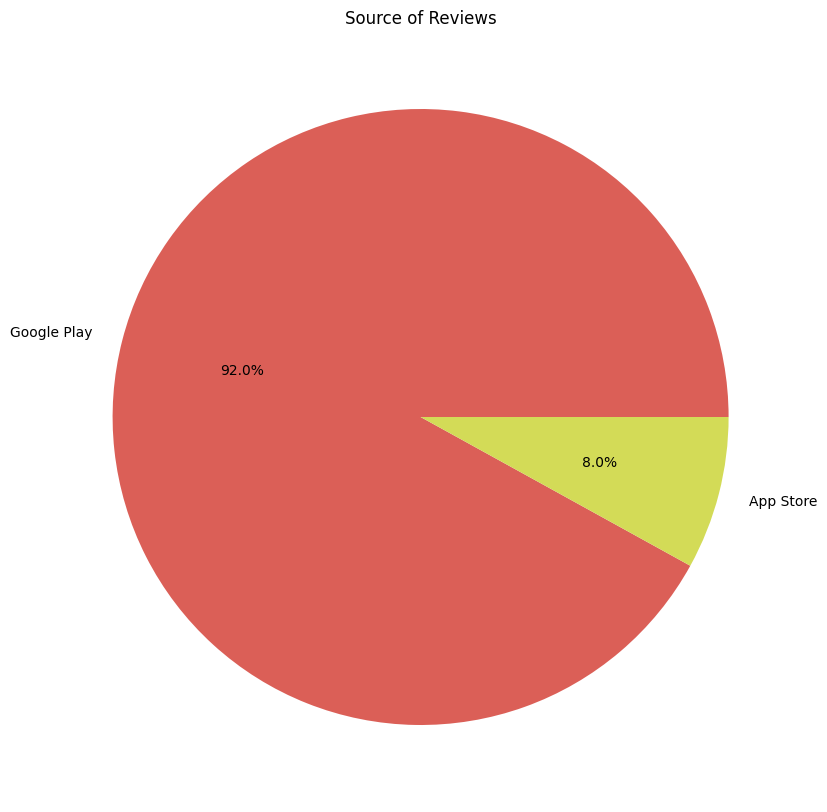

In [19]:
plt.figure(figsize=(10, 10))
counts = df['source'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Source of Reviews')
plt.show()

In [20]:
counts = df['source'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title='Source of Reviews')
fig.show()

In [21]:
df['rating'].unique()

array([2, 3, 1, 5, 4])

In [22]:
df['rating'].value_counts()

5    15495
1     9725
4     3244
3     2584
2     1796
Name: rating, dtype: int64

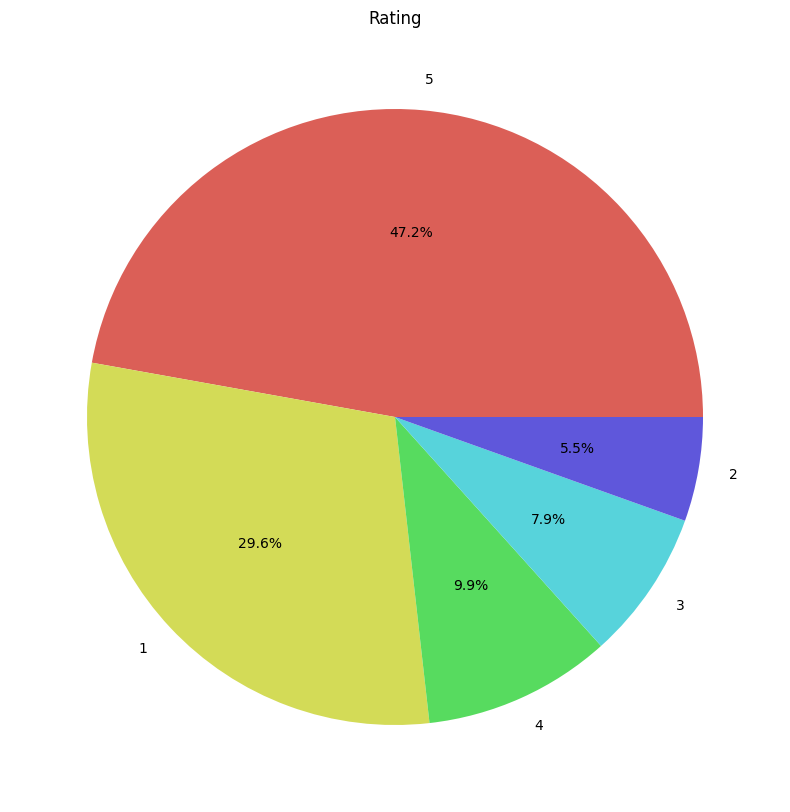

In [23]:
plt.figure(figsize=(10, 10))
counts = df['rating'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Rating')
plt.show()

In [24]:
fig = go.Figure(data=[go.Bar(x=df['rating'].value_counts().index, y=df['rating'].value_counts())])
fig.update_layout(title='Rating',xaxis_title="Rating",yaxis_title="Count")
fig.show()

In [25]:
counts = df['rating'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title='Rating')
fig.show()

In [26]:
df['review_date'] = pd.to_datetime(df['review_date'])

In [27]:
df['review_date']

0       2023-08-07 14:18:00
1       2023-07-19 20:52:00
2       2023-06-07 23:03:00
3       2023-10-07 00:53:00
4       2023-06-07 16:57:00
                ...        
32905   2023-06-07 01:23:00
32906   2023-07-19 08:01:00
32907   2023-07-17 06:39:00
32908   2023-07-07 17:47:00
32909   2023-07-07 07:01:00
Name: review_date, Length: 32844, dtype: datetime64[ns]

In [28]:
df1 = df.copy()

In [29]:
df1.set_index('review_date', inplace=True)

In [30]:
start_date = df1.index.min()
end_date = df1.index.max()

In [31]:
print("Start Date of Reviews:", start_date)
print("End Date of Reviews:", end_date)

Start Date of Reviews: 2023-05-07 22:53:00
End Date of Reviews: 2023-12-07 23:59:00


In [32]:
week_delta = pd.Timedelta(days=6)
current_date = start_date

In [33]:
while current_date <= end_date:
    start_week = current_date
    print(start_week)
    end_week = current_date + week_delta
    print(end_week)
    current_week_data = df1[(df1.index >= start_week) & (df1.index < end_week)]
    print(current_week_data)
    weekly_counts = current_week_data.resample('D').size()
    print(weekly_counts)
    fig = px.bar(weekly_counts, x=weekly_counts.index, y=weekly_counts.values,
                 labels={'x': 'Date', 'y': 'Number of Reviews'},
                 title=f'Reviews for Week {start_week.strftime("%Y-%m-%d")} to {end_week.strftime("%Y-%m-%d")}')
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()
    current_date += week_delta

2023-05-07 22:53:00
2023-05-13 22:53:00
                          source  \
review_date                        
2023-05-07 23:34:00  Google Play   
2023-05-07 23:12:00  Google Play   
2023-05-07 23:49:00  Google Play   
2023-05-07 23:59:00  Google Play   
2023-05-07 23:12:00  Google Play   
...                          ...   
2023-05-07 23:37:00    App Store   
2023-05-07 23:43:00    App Store   
2023-05-07 23:32:00    App Store   
2023-05-07 23:38:00    App Store   
2023-05-07 23:37:00    App Store   

                                                    review_description  rating  
review_date                                                                     
2023-05-07 23:34:00  UI is really slow and is unappealing. Has a lo...       3  
2023-05-07 23:12:00  Sometimes I think to myself, what does this wo...       5  
2023-05-07 23:49:00  It's great but it could really use a trending ...       5  
2023-05-07 23:59:00  Pretty barebone right now although it got pote...       5  
2023-

2023-05-13 22:53:00
2023-05-19 22:53:00
Empty DataFrame
Columns: [source, review_description, rating]
Index: []
Series([], Freq: D, dtype: int64)


ValueError: ignored

In [ ]:
daily_counts = df1.resample('D').size()
print(daily_counts)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=daily_counts.index, y=daily_counts.values,
                     marker_color='skyblue'))
fig.update_layout(title='Number of Reviews Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis_tickangle=-45)
fig.show()

In [34]:
fig = go.Figure()
for source_name, source_data in df1.groupby('source'):
    fig.add_trace(go.Scatter(x=source_data.resample('D').size().index, y=source_data.resample('D').size().values,
                            mode='lines', name=source_name))
fig.update_layout(title='Number of Reviews Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis_tickangle=-45)
fig.show()

In [35]:
fig = go.Figure()
for source_name, source_data in df1.groupby('source'):
    fig.add_trace(go.Scatter(x=source_data.resample('D').size().index, y=source_data.resample('D').size().values,
                            mode='lines', name=source_name))
fig.update_layout(title='Number of Reviews Day-wise',
                  xaxis_title='Date',
                  yaxis_title='Number of Reviews',
                  xaxis_tickangle=-45)
fig.show()

In [36]:
df['rating']=df['rating'].map({1:-1,2:-1,3:0,4:1,5:1})

In [37]:
df

source                                 review_description  rating  \
0      Google Play  Meh. Not the greatest experience on a Chromebo...      -1   
1      Google Play  Pretty good for a first launch!! Its easy to u...       0   
2      Google Play  For a brand new app, it's very well optimized....       0   
3      Google Play  Great app with a lot of potential! However, th...       0   
4      Google Play  The app is good, but it needs a lot of functio...       0   
...            ...                                                ...     ...   
32905    App Store  This killed my dog. Mark zuckerburg strangled ...      -1   
32906    App Store              Add Search and hashtag like Twitter !      -1   
32907    App Store                                        bad twister      -1   
32908    App Store                       Yet another trash from Meta.      -1   
32909    App Store  Nothing special this app is just a copy of twi...      -1   

              review_date  
0     2023-08-07 14:18:00  
1     2023-07-19 20:52:00  
2     2023-06-07 23:03:00  
3     2023-10-07 00:53:00  
4     2023-06-07 16:57:00  
...                   ...  
32905 2023-06-07 01:23:00  
32906 2023-07-19 08:01:00  
32907 2023-07-17 06:39:00  
32908 2023-07-07 17:47:00  
32909 2023-07-07 07:01:00  

[32844 rows x 4 columns]

In [38]:
df_new = df[['review_description', 'rating']]

In [39]:
df_new

review_description  rating
0      Meh. Not the greatest experience on a Chromebo...      -1
1      Pretty good for a first launch!! Its easy to u...       0
2      For a brand new app, it's very well optimized....       0
3      Great app with a lot of potential! However, th...       0
4      The app is good, but it needs a lot of functio...       0
...                                                  ...     ...
32905  This killed my dog. Mark zuckerburg strangled ...      -1
32906              Add Search and hashtag like Twitter !      -1
32907                                        bad twister      -1
32908                       Yet another trash from Meta.      -1
32909  Nothing special this app is just a copy of twi...      -1

[32844 rows x 2 columns]

In [40]:
df_new['rating'].unique()

array([-1,  0,  1])

In [41]:
df_new['rating'].value_counts()

 1    18739
-1    11521
 0     2584
Name: rating, dtype: int64

In [42]:
fig = go.Figure(data=[go.Bar(x=df_new['rating'].value_counts().index, y=df_new['rating'].value_counts())])
fig.update_layout(title='Rating',xaxis_title="Rating",yaxis_title="Count")
fig.show()

In [43]:
counts = df_new['rating'].value_counts()
fig = go.Figure(data=[go.Pie(labels=counts.index, values=counts)])
fig.update_layout(title='Rating')
fig.show()

In [44]:
#data preprocessing:
#1.convert everything into lower case
def clean_text(text):
    text = text.lower()
    return text.strip()

In [45]:
df_new.review_description = df_new.review_description.apply(lambda x: clean_text(x))

In [46]:
#remove puncutations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [48]:
df_new.review_description = df_new.review_description.apply(lambda x:remove_punctuation(x))

In [49]:
df_new.review_description = df_new.review_description.apply(lambda x: x.lower())

In [50]:
import re

In [51]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

In [52]:
df_new.review_description = df_new.review_description.apply(lambda x: tokenization(x))

In [53]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [54]:
def remove_stopwords(text):
    output= " ".join(i for i in text if i not in stopwords)
    return output

In [55]:
df_new.review_description = df_new.review_description.apply(lambda x:remove_stopwords(x))

In [56]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip()
    text = re.sub('\S*\d\S*\s*','', text).strip()
    return text.strip()

In [57]:
df_new.review_description = df_new.review_description.apply(lambda x: clean_text(x))

In [58]:
#advanced nlp library-
import spacy
nlp = spacy.load('en_core_web_sm')

In [59]:
#remove words with same meaning
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [60]:
df_new.review_description =  df_new.review_description.apply(lambda x: lemmatizer(x))

In [61]:
#remove urls
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [62]:
df_new.review_description = df_new.review_description.apply(lambda x: remove_urls(x))

In [63]:
#digit removal code
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [64]:
df_new.review_description = df_new.review_description.apply(lambda x: remove_digits(x))

In [65]:
def remove_digits1(sample_text):
    clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()])
    return(clean_text)

In [66]:
df_new.review_description = df_new.review_description.apply(lambda x: remove_digits1(x))

In [67]:
#remove emojis from review using unicode
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [68]:
#cleaned data
df_new.review_description = df_new.review_description.apply(lambda x: remove_emojis(x))

In [69]:
df_new

review_description  rating
0      meh great experience chromebook customize phon...      -1
1      pretty good launch easy use selfexplanatory d ...       0
2      brand new app optimize miss feature app like t...       0
3      great app lot potential lot need fix example o...       0
4      app good need lot functionality example search...       0
...                                                  ...     ...
32905           kill dog mark zuckerburg strangle dog go      -1
32906                    add search hashtag like twitter      -1
32907                                        bad twister      -1
32908                                         trash meta      -1
32909                           special app copy twitter      -1

[32844 rows x 2 columns]

In [70]:
import wordcloud

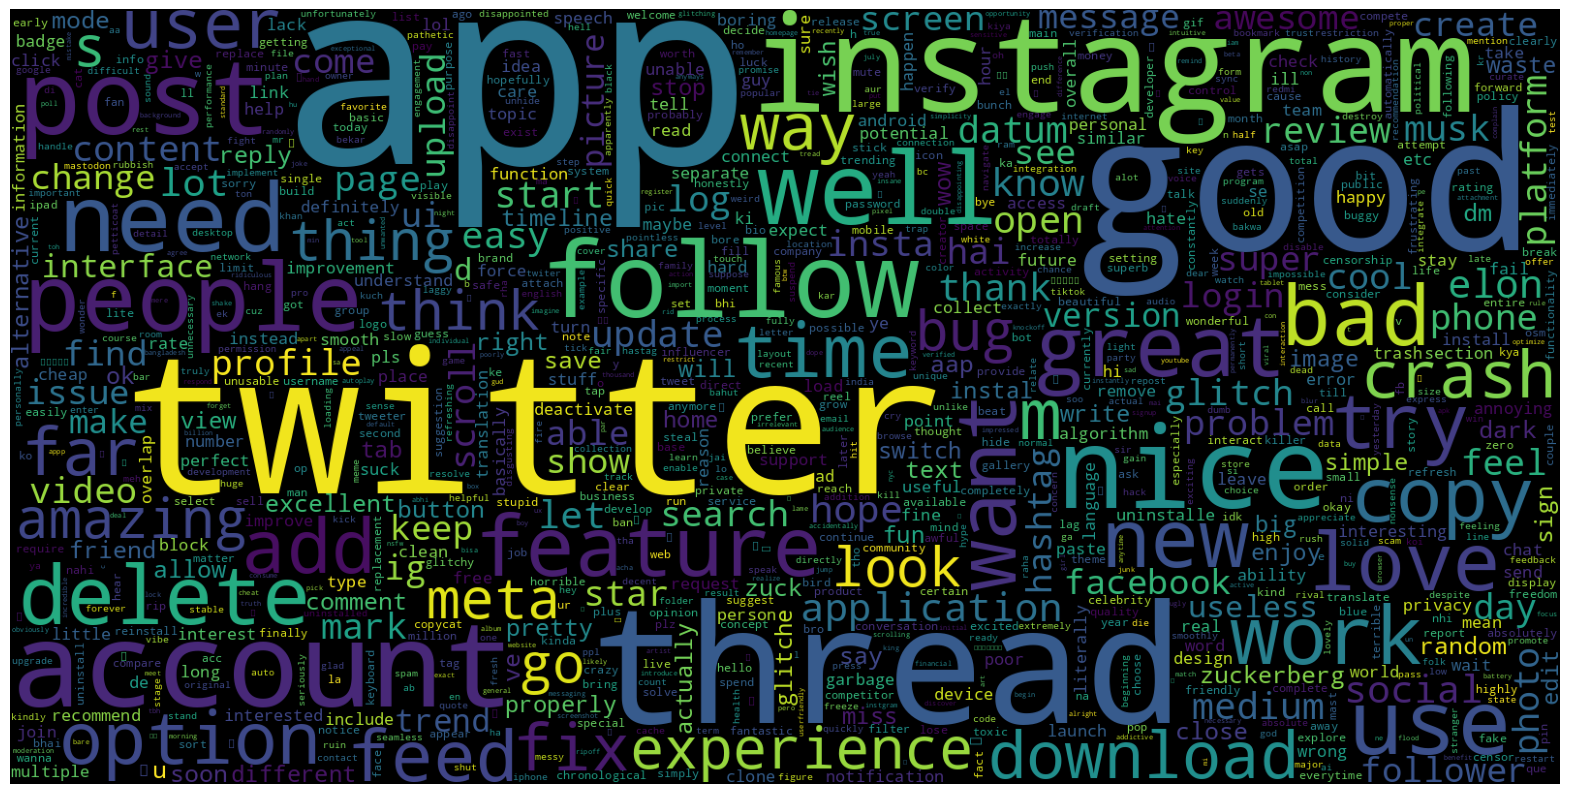

In [71]:
from wordcloud import WordCloud
data = df_new.review_description
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

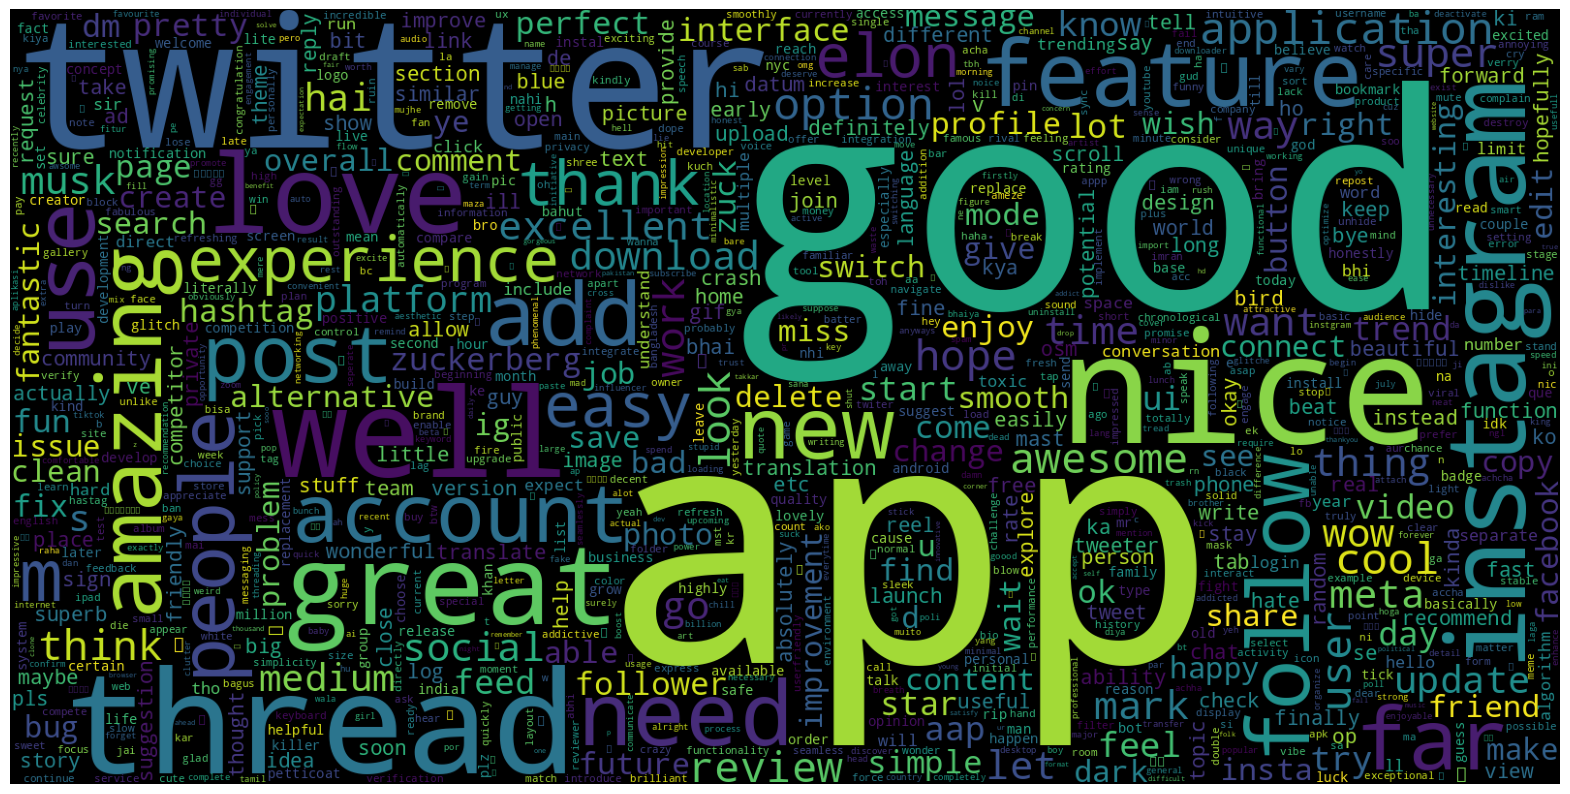

In [72]:
from wordcloud import WordCloud
data = df_new[df_new['rating'] == 1]['review_description']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

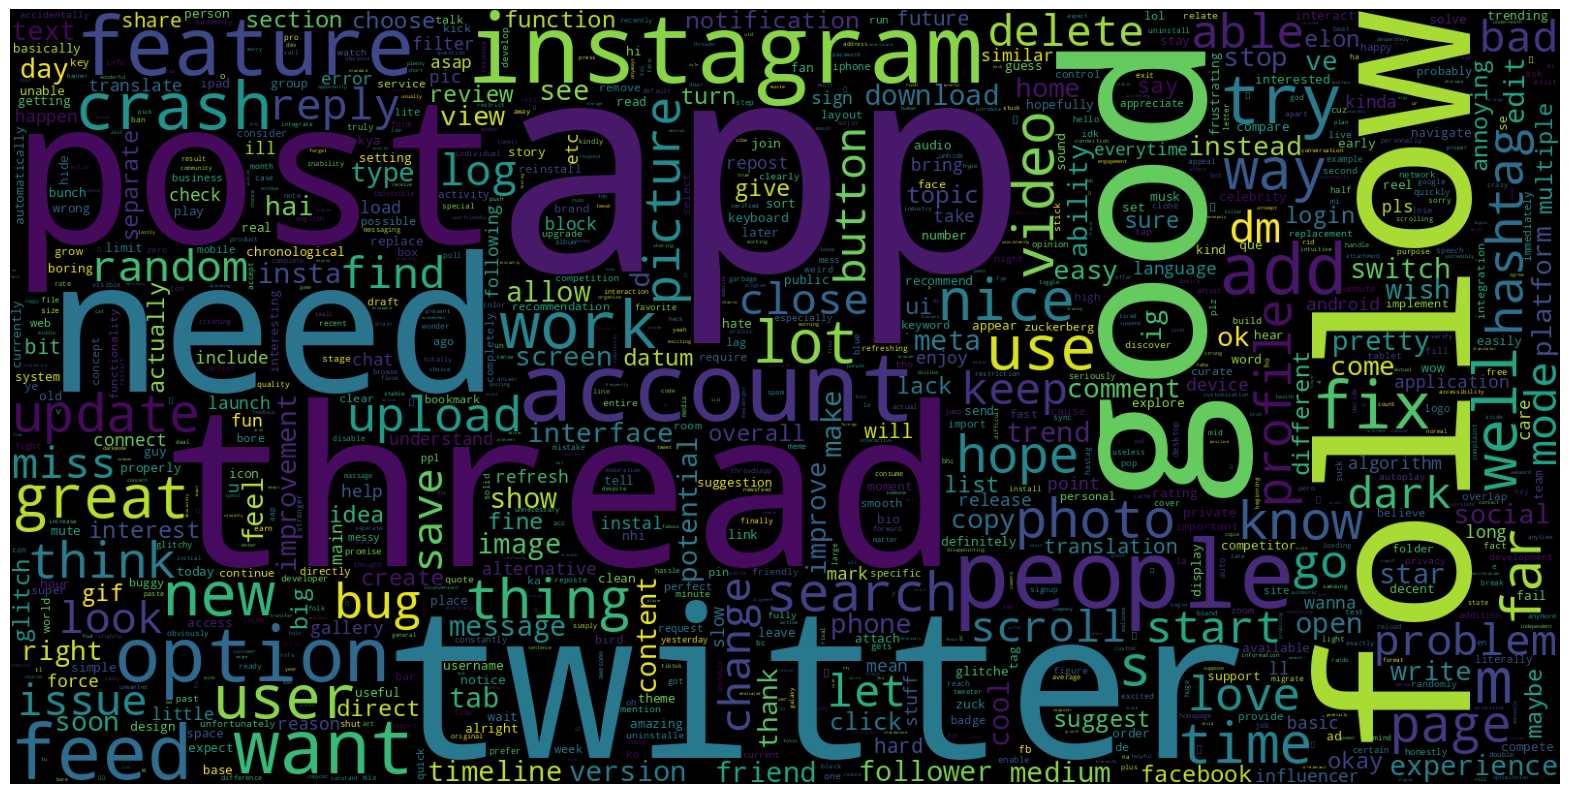

In [73]:
data = df_new[df_new['rating'] == 0]['review_description']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

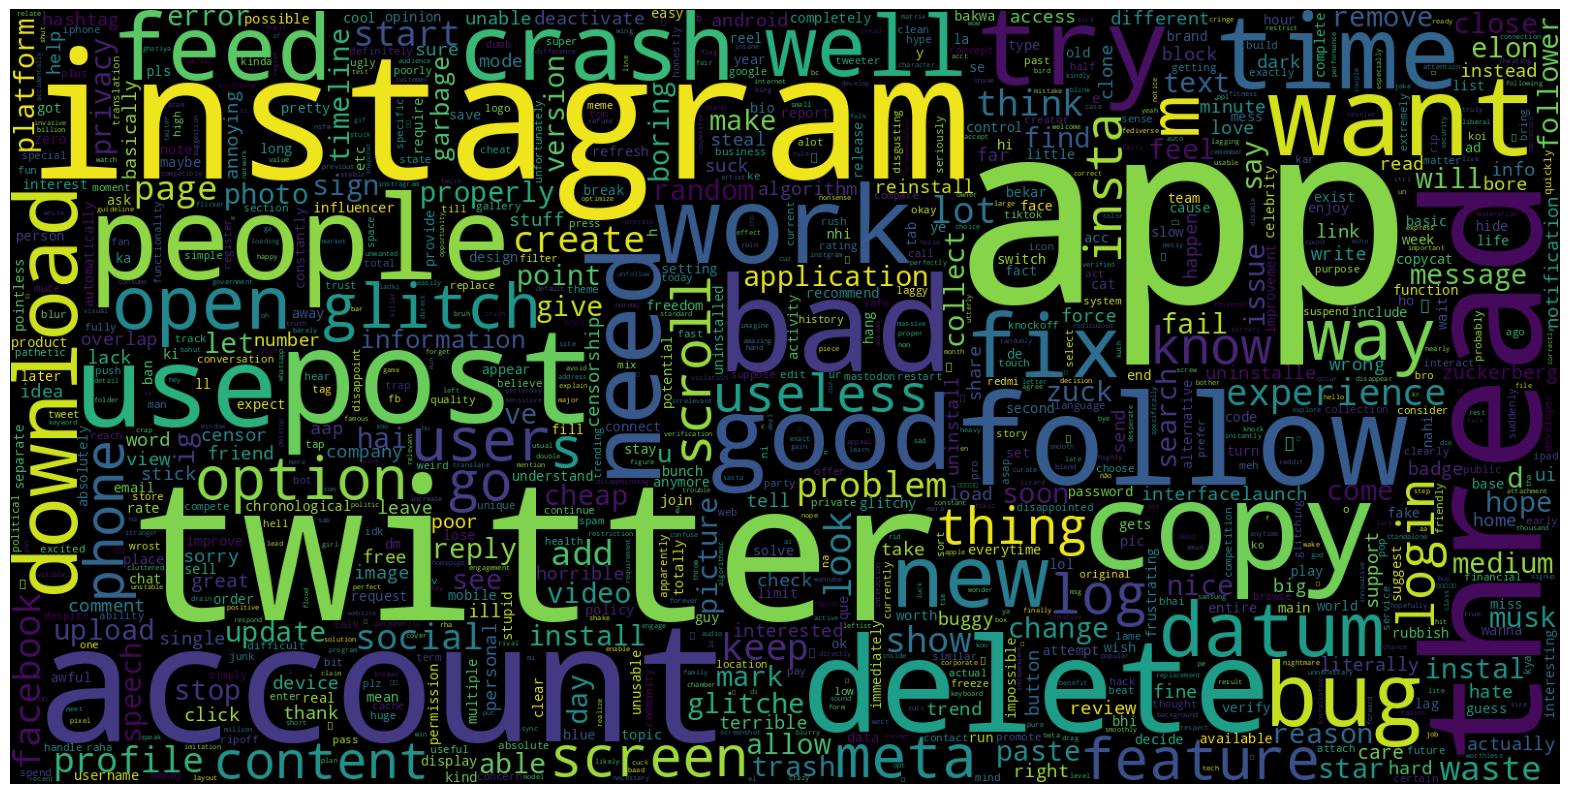

In [74]:
data = df_new[df_new['rating'] == -1]['review_description']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
tf1=TfidfVectorizer()
data_vec=tf1.fit_transform(df_new['review_description'])

In [77]:
y=df_new['rating'].values

In [78]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.2,stratify = y, random_state=42)

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [83]:
import pickle

In [84]:
with open('tfidf_vectorizer.pkl','wb') as model_file:
    pickle.dump(tf1,model_file)

In [85]:
sv = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ad = AdaBoostClassifier()

models = [sv, dt, rf, ad]

accuracies = []

for model in models:
    print('Results for the model:', model.__class__.__name__)
    model.fit(X_balanced, y_balanced)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)

    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm)

    report = classification_report(y_test, y_pred)
    print('Classification Report:\n', report)

    print('\n')

    accuracies.append(accuracy)

print('List of Accuracies:', accuracies)

Results for the model: SVC
Accuracy: 0.7603897092403714
Confusion Matrix:
 [[1693  110  501]
 [ 201   68  248]
 [ 237  277 3234]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.79      0.73      0.76      2304
           0       0.15      0.13      0.14       517
           1       0.81      0.86      0.84      3748

    accuracy                           0.76      6569
   macro avg       0.59      0.58      0.58      6569
weighted avg       0.75      0.76      0.76      6569



Results for the model: DecisionTreeClassifier
Accuracy: 0.6990409499162734
Confusion Matrix:
 [[1448  267  589]
 [ 191  103  223]
 [ 421  286 3041]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.70      0.63      0.66      2304
           0       0.16      0.20      0.18       517
           1       0.79      0.81      0.80      3748

    accuracy                           0.70      6569
   macro avg      

In [86]:
model_names = ['SVC', 'DecisionTree', 'RandomForest', 'AdaBoost']
fig = go.Figure(data=go.Bar(x=model_names, y=accuracies))
fig.update_layout(title='Model Accuracies',
                  xaxis_title='Model',
                  yaxis_title='Accuracy',
                  yaxis_tickformat='.2%',
                  yaxis_range=[0, 1],
                  xaxis_tickangle=0)
fig.show()

In [87]:
 smote = SMOTE(random_state=42)
x_balanced,y_balanced = smote.fit_resample(X_train,y_train)

In [88]:
sv =SVC()

In [89]:
model_sv = sv.fit(X_balanced,y_balanced)

In [90]:
y_pred_sv = model_sv.predict(X_test)

In [91]:
accuracy = accuracy_score(y_test,y_pred_sv)
print(f'Accuracy:{accuracy:.2f}')

Accuracy:0.76


In [92]:
model_filename = 'svm_model.pkl'
with open(model_filename,'wb') as model_file:
  pickle.dump(model_sv,model_file)

In [93]:
dt = DecisionTreeClassifier()

In [94]:
model_dt = dt.fit(X_balanced,y_balanced)

In [95]:
y_pred_dt = model_sv.predict(X_test)

In [96]:
accuracy = accuracy_score(y_test,y_pred_sv)
print(f'Accuracy:{accuracy:.2f}')

Accuracy:0.76
